<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Internações,-Óbitos-e-Taxa-de-Mortalidade-do-SUS-entre-2011-e-2021:-Impactos-da-Pandemia" data-toc-modified-id="Internações,-Óbitos-e-Taxa-de-Mortalidade-do-SUS-entre-2011-e-2021:-Impactos-da-Pandemia-0">Internações, Óbitos e Taxa de Mortalidade do SUS entre 2011 e 2021: Impactos da Pandemia</a></span></li><li><span><a href="#Parte-I:-Preparação-do-Ambiente" data-toc-modified-id="Parte-I:-Preparação-do-Ambiente-1">Parte I: Preparação do Ambiente</a></span><ul class="toc-item"><li><span><a href="#Limpeza-dos-Dados" data-toc-modified-id="Limpeza-dos-Dados-1.1">Limpeza dos Dados</a></span><ul class="toc-item"><li><span><a href="#Dados-Geográficos" data-toc-modified-id="Dados-Geográficos-1.1.1">Dados Geográficos</a></span></li><li><span><a href="#Dados-Demográficos" data-toc-modified-id="Dados-Demográficos-1.1.2">Dados Demográficos</a></span></li><li><span><a href="#DataSUS:-Óbitos,-Internações-e-Taxa-de-Mortalidade" data-toc-modified-id="DataSUS:-Óbitos,-Internações-e-Taxa-de-Mortalidade-1.1.3">DataSUS: Óbitos, Internações e Taxa de Mortalidade</a></span></li></ul></li><li><span><a href="#Definição-de-Funções" data-toc-modified-id="Definição-de-Funções-1.2">Definição de Funções</a></span><ul class="toc-item"><li><span><a href="#Corrigindo-Dados-pela-População" data-toc-modified-id="Corrigindo-Dados-pela-População-1.2.1">Corrigindo Dados pela População</a></span></li><li><span><a href="#Padrões-de-Cores" data-toc-modified-id="Padrões-de-Cores-1.2.2">Padrões de Cores</a></span></li><li><span><a href="#Mapa-Colorido-das-Unidades-da-Federação" data-toc-modified-id="Mapa-Colorido-das-Unidades-da-Federação-1.2.3">Mapa Colorido das Unidades da Federação</a></span></li><li><span><a href="#Gráficos-de-Linhas" data-toc-modified-id="Gráficos-de-Linhas-1.2.4">Gráficos de Linhas</a></span></li><li><span><a href="#Gráficos-de-Violinos-(Violinplot)" data-toc-modified-id="Gráficos-de-Violinos-(Violinplot)-1.2.5">Gráficos de Violinos (Violinplot)</a></span></li></ul></li></ul></li><li><span><a href="#Parte-II:-Análises-e-Visualizações" data-toc-modified-id="Parte-II:-Análises-e-Visualizações-2">Parte II: Análises e Visualizações</a></span><ul class="toc-item"><li><span><a href="#Taxa-de-Mortalidade" data-toc-modified-id="Taxa-de-Mortalidade-2.1">Taxa de Mortalidade</a></span></li><li><span><a href="#Óbitos-e-Internações-per-Capita-nas-Regiões" data-toc-modified-id="Óbitos-e-Internações-per-Capita-nas-Regiões-2.2">Óbitos e Internações per Capita nas Regiões</a></span></li><li><span><a href="#Estados" data-toc-modified-id="Estados-2.3">Estados</a></span></li></ul></li><li><span><a href="#Próximos-Passos" data-toc-modified-id="Próximos-Passos-3">Próximos Passos</a></span></li><li><span><a href="#Fontes-dos-Dados" data-toc-modified-id="Fontes-dos-Dados-4">Fontes dos Dados</a></span></li><li><span><a href="#Contato" data-toc-modified-id="Contato-5">Contato</a></span></li></ul></div>

# Internações, Óbitos e Taxa de Mortalidade do SUS entre 2011 e 2021: Impactos da Pandemia


Este estudo analisa algumas informações do Sistema Único de Saúde do Brasil sobre internações, óbitos e taxa de mortalidade entre janeiro de 2011 e março de 2021, nas 5 regiões e nas 27 unidades federativas, com o objetivo de compreender melhor a evolução destas variáveis e observar como a pandemia tem impactado cada uma delas.

A organização está feita em duas partes:

Na primeira, estão agrupadas a limpeza dos dados, exposições iniciais das bases de dados e definição de funções que serão posteriormente utilizada. A proposta é concentrar nesta **primeira parte** a complexidade técnica da análise, como grandes blocos de código.

Assim, é possível abstrair estas complexidades da segunda parte, tornando-a mais acessível a leitores que não tenham familiaridade com programação. A **segunda parte** é dedicada às análises e visualizações dos dados.

# Parte I: Preparação do Ambiente

## Limpeza dos Dados

In [8]:
!pipreqsnb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geobr.read_state

sns.set_style('whitegrid')

In [2]:
# from brazil_colors import brazil_colormaps, color_of_each_state_or_region
from brazil_colors import get_brazil_colors, create_ordered_colormap, states_per_region

# colormaps, cores_por_uf_regiao = get_brazil_colors()
# stronger_colormaps, cores_fortes_por_uf_regiao = get_brazil_colors(stronger_colors=True)
# states_per_region

In [10]:
help(get_brazil_colors)
help(create_ordered_colormap)

Help on function get_brazil_colors in module brazil_colors:

get_brazil_colors(stronger_colors=False)
    :param stronger_colors: try stronger_colors=True if you need more contrast between colors
    :return: two dictionaries: the first with colormaps, and another with (key,value) = (state or region, its own color)
    
    (for more, see module brazil_colors.py docstring)

Help on function create_ordered_colormap in module brazil_colors:

create_ordered_colormap(index, output_as_list=False, replace_state_color_by_region=False)
        :param index: pandas Index or list-like object with the desired order of colors
        :param output_as_list: default output is a matplotlib cmap <matplotlib.colors.ListedColormap>
        :param replace_state_color_by_region: if True, all states of a region will have the same color.
                                              if False, each state keeps its own color.
        :return: list or matplotlib colormap
    
        create_ordered_colormap() 

In [2]:
## opcional
## suprime avisos de erros

import warnings
warnings.filterwarnings('ignore')

### Dados Geográficos

A biblioteca [geobr](https://ipeagit.github.io/geobr/index.html), do IPEA, busca informações do IBGE e as retorna como um GeoDataFrame da biblioteca [GeoPandas](https://geopandas.org/). Neste estudo, utilizaremos apenas os dados geográficos de fronteiras entre os estados brasileiros, com a finalidade de utilizá-los como base para visualização de dados.

In [3]:
# dados geo

def get_states_geodata():
    path = 'data/'
    file = 'geo_estados_2019.parquet.gz'
    filepath = path + file
    
    import os.path
    if os.path.exists(filepath):
        # abreviacoes: gdf para geodataframe, gpd para geopandas
        gdf = gpd.read_parquet(filepath)

    else:
        # a biblioteca geobr, do IPEA, traz dados do ibge em um geodataframe
        gdf = geobr.read_state(code_state='all', year=2019)

        # o método .to_parquet() do geopandas dispara um aviso de cautela para uso em produção
        # vamos ocultar este aviso
        import warnings
        warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
        
        # salvando o arquivo no formato parquet, para evitar downloads futuros desnecessarios
        gdf.to_parquet(filepath, compression='gzip')

    # renomeando unidades da federação de acordo com outros dataframes
    renaming_ufs = {'Amazônas': 'Amazonas',
                    'Rio Grande Do Norte': 'Rio Grande do Norte',
                    'Rio De Janeiro': 'Rio de Janeiro',
                    'Rio Grande Do Sul': 'Rio Grande do Sul',
                    'Mato Grosso Do Sul': 'Mato Grosso do Sul'}
    
    # ajustando nomes de colunas
    gdf['name_state'].replace(renaming_ufs, inplace=True)  
    gdf.set_index('name_state', inplace=True)
    gdf.rename_axis('Unidade da Federação', axis=0, inplace=True)
    
    new_columns=['Codigo_Estado', 'Sigla', 'Codigo_Regiao', 'Nome_Regiao', 'geometry']
    gdf.rename(columns=dict(zip(gdf.columns, new_columns)), inplace=True)
    
    # convertendo do float64 para int64
    for col in ['Codigo_Estado', 'Codigo_Regiao']:
        gdf[col] = gdf[col].astype('int64')
    
    return gdf

estados_geo = get_states_geodata()
estados_regioes_ordem_oficial = estados_geo['Nome_Regiao'].to_dict()

In [6]:
display(estados_geo.info(), estados_geo.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Codigo_Estado  27 non-null     int64   
 1   Sigla          27 non-null     object  
 2   Codigo_Regiao  27 non-null     int64   
 3   Nome_Regiao    27 non-null     object  
 4   geometry       27 non-null     geometry
dtypes: geometry(1), int64(2), object(2)
memory usage: 1.3+ KB


None

,Codigo_Estado,Sigla,Codigo_Regiao,Nome_Regiao,geometry
Unidade da Federação,,,,,
Rondônia,11,RO,1,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916..."
Acre,12,AC,1,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ..."
Amazonas,13,AM,1,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ..."
Roraima,14,RR,1,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
Pará,15,PA,1,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ..."


### Dados Demográficos

In [4]:
def get_population(period='month'):
    
    path = 'data/'
    
    ## RETORNA DF COM DADOS ANUAIS (2011-2020)
    if period=='year':
        file = 'população-residente-estimada.csv.gz'
        filepath = path + file
        populacao_residente_estimada = pd.read_csv(filepath, 
                                                   index_col='Unidade da Federação',
                                                   compression='gzip', sep=';', encoding='utf-8', 
                                                   engine = 'python', skiprows=3, skipfooter=92)

        populacao_residente_estimada.drop(columns=['2008', '2009'], inplace=True)
        
        return populacao_residente_estimada

    ## RETORNA DF COM DADOS MENSAIS (2011/Jan-2021/Mar)
    else:
        file = 'Populacoes_Projetadas_Mensais_dia_01_ate_2030.csv.gz'
        filepath = path + file
        populacao_projecao_mensal = pd.read_csv(filepath, 
                                       compression='gzip', sep=';', encoding='ISO-8859-1', 
                                       engine = 'python', skiprows=1, skipfooter=2, thousands='.')

        populacao_projecao_mensal = populacao_projecao_mensal.set_index('DATA').T[6:] # tirando br e 5 regioes, deixando só estados
        populacao_projecao_mensal = populacao_projecao_mensal.loc[:,'1-jan-11':'1-mar-21']

        populacao_projecao_mensal.rename_axis(None, axis=1, inplace=True)
        populacao_projecao_mensal.rename_axis('Unidade da Federação', axis=0, inplace=True)

        populacao_projecao_mensal = reformat_data(populacao_projecao_mensal)

        return populacao_projecao_mensal
    
    
        

def reformat_data(df):
    import locale
    locale.setlocale(locale.LC_ALL , 'pt_BR.UTF-8')
    df.columns = pd.to_datetime(df.columns, format='%d-%b-%y').strftime('%Y/%^b')
    df.columns = [col.replace(col[-2:], col[-2:].lower()) for col in df.columns]
    return df


populacao_projecao_mensal = get_population(period='month')
# populacao_residente_estimada = get_population(period='year')

In [5]:
display(populacao_projecao_mensal.info(), populacao_projecao_mensal.head())

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 123 entries, 2011/Jan to 2021/Mar
dtypes: int64(123)
memory usage: 26.2+ KB


None

,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,1608218,1609862,1611507,1613154,1614802,1616451,1618102,1619753,1621406,1623060,...,1794589,1796173,1797755,1799334,1800911,1802485,1804057,1805627,1807193,1808758
Acre,772065,773169,774273,775377,776481,777584,778687,779789,780891,781993,...,893566,894601,895635,896668,897701,898732,899762,900792,901820,902848
Amazonas,3585042,3590674,3596303,3601931,3607556,3613180,3618801,3624421,3630038,3635654,...,4202340,4207566,4212786,4218002,4223212,4228416,4233615,4238809,4243997,4249179
Roraima,462628,463175,463746,464339,464955,465594,466255,466938,467643,468370,...,618500,620243,621983,623720,625455,627187,628916,630642,632364,634082
Pará,7814013,7822086,7830154,7838217,7846275,7854327,7862375,7870417,7878454,7886485,...,8684288,8691518,8698739,8705949,8713150,8720340,8727520,8734691,8741851,8749000


### DataSUS: Óbitos, Internações e Taxa de Mortalidade

In [6]:
def datasus2pandas(file):
    path = 'data/'
    filepath = path + file + '.csv.gz'
    df = pd.read_csv(filepath, compression='gzip', sep=';', encoding='ISO-8859-1', 
                     engine='python', skiprows = 3, skipfooter = 12, # skipfooter = 11 para manter 'Total mensal'
                     na_values=['-','...'], # conforme legendas no datasus
                     verbose = False) # verbose=True para receber avisos de NaN
    
    df.set_index('Unidade da Federação', inplace=True)
    df.index = [uf[3:] for uf in df.index] #'11 Rondônia' -> 'Rondônia'
    df.drop('Total', axis=1, inplace=True) # removendo coluna 'Total por UF'
    df = df.loc[:,'2011/Jan':] # padronização temporal com outros dataframes
    
    # substituindo virgulas por pontos e convertendo de 'object' para 'float64'
    if (file == 'taxa_mortalidade'): 
        df = df.replace(',', '.', regex=True).astype('float64')
        
    ## Caso queira modificar a data
    # import locale
    # locale.setlocale(locale.LC_ALL , 'pt_BR.UTF-8')
    # pd.to_datetime(obitos.columns, format='%Y/%b').strftime('%Y/%m')
    
    return df

internacoes = datasus2pandas('internacoes')
obitos = datasus2pandas('obitos')
taxa_mortalidade = datasus2pandas('taxa_mortalidade')

Com a igualdade abaixo, verificamos que a taxa de mortalidade utilizada neste estudo é igual ao número de óbitos dividido pelo número de internações. A tabela "taxa_mortalidade" expressa esta relação em porcentagem.

In [7]:
round((obitos / internacoes*100), ndigits=2).equals(taxa_mortalidade)

True

In [8]:
for df in (internacoes, obitos, taxa_mortalidade):
    print(df.info(), end='\n' + '-'*30 + '\n')

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 123 entries, 2011/Jan to 2021/Mar
dtypes: int64(123)
memory usage: 26.2+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 123 entries, 2011/Jan to 2021/Mar
dtypes: int64(123)
memory usage: 26.2+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 123 entries, 2011/Jan to 2021/Mar
dtypes: float64(123)
memory usage: 26.2+ KB
None
------------------------------


In [9]:
for df in (internacoes, obitos, taxa_mortalidade):
    display(df.head())

,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Rondônia,8014,7912,8362,8711,8553,8170,8038,8386,9272,8031,...,6849,8353,8473,8907,8165,9058,8130,8065,6463,6431
Acre,4712,4235,4364,4412,4287,4567,4427,4027,4228,4147,...,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969
Amazonas,14083,12878,13807,14003,14795,14230,15410,13604,13385,13278,...,14972,15054,14244,15290,15429,15085,13885,14517,17265,15855
Roraima,1905,1912,2341,2262,1847,2017,2184,2426,2377,2284,...,2846,2899,3263,3063,3481,3435,3496,3157,3304,3278
Pará,44832,43480,44181,43663,40456,43704,40525,40360,43920,42383,...,32102,33340,38719,36072,37057,38147,36941,36537,34126,27721


,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Rondônia,172,142,165,194,183,185,168,250,269,155,...,357,446,476,408,293,266,360,435,333,559
Acre,149,125,101,145,141,113,156,127,144,110,...,191,192,163,136,173,119,147,143,188,205
Amazonas,310,342,332,357,335,354,392,267,332,328,...,1465,916,657,673,609,715,607,1330,1616,1796
Roraima,48,31,48,47,34,48,53,50,44,48,...,328,177,85,107,114,135,127,190,322,287
Pará,832,783,818,727,698,732,633,695,883,814,...,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277


,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Rondônia,2.15,1.79,1.97,2.23,2.14,2.26,2.09,2.98,2.90,1.93,...,5.21,5.34,5.62,4.58,3.59,2.94,4.43,5.39,5.15,8.69
Acre,3.16,2.95,2.31,3.29,3.29,2.47,3.52,3.15,3.41,2.65,...,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17
Amazonas,2.20,2.66,2.40,2.55,2.26,2.49,2.54,1.96,2.48,2.47,...,9.78,6.08,4.61,4.40,3.95,4.74,4.37,9.16,9.36,11.33
Roraima,2.52,1.62,2.05,2.08,1.84,2.38,2.43,2.06,1.85,2.10,...,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.76
Pará,1.86,1.80,1.85,1.67,1.73,1.67,1.56,1.72,2.01,1.92,...,6.91,4.57,4.55,3.32,2.75,2.82,2.89,3.18,3.60,4.61


## Definição de Funções

### Corrigindo Dados pela População

In [10]:
# list(estados_regioes_ordem_oficial.keys()) == internacoes.index.to_list()

def concat_region(df):
    if estados_geo.index.equals(df.index):
    #     internacoes.insert(0, 'Regioes', estados_geo['name_region'])
        new_df = pd.concat([estados_geo['Nome_Regiao'],df], axis=1)
        new_df = new_df.groupby(by='Nome_Regiao', sort=False).sum()
        return new_df
    
def divide_by_population(df, df_pop=populacao_projecao_mensal, 
                         return_regions=False, percentage=False):
    # verify df.columns.equals(df_pop.columns) or shape
    
    if return_regions:
        df = concat_region(df)
        df_pop = concat_region(df_pop)
    
    new_df = (df / df_pop)
    
    if percentage:
        new_df = new_df*100
    
    return new_df

### Padrões de Cores

Definição de padrões de cores a serem utilizadas ao longo do estudo:
Uma cor para cada região, com variações de tonalidades desta cor para as Unidades da Federação pertencentes a tal região.

Nesta seção são definidos dicionários e *colormaps* que serão chamados pelas funções gráficas.

Padrão de Cores:

    Norte        - Verde
    Nordeste     - Vermelho
    Sudeste      - Roxo
    Sul          - Azul
    Centro Oeste - Amarelo/Laranja

In [11]:
## MODULOS IMPORTADOS DE brazil_colors.py
colormaps, cores_por_uf_regiao = get_brazil_colors()
stronger_colormaps, cores_fortes_por_uf_regiao = get_brazil_colors(stronger_colors=True)
states_per_region

{'Norte': 7, 'Nordeste': 9, 'Sudeste': 4, 'Sul': 3, 'Centro Oeste': 4}

### Mapa Colorido das Unidades da Federação

In [12]:
def geo_colors_plot():
    
    estados_geo['to_plot'] = estados_geo['Codigo_Estado'].astype(str) + estados_geo.index

    fig, ax = plt.subplots(figsize=(10,10))#, dpi=300)'
    estados_geo.reset_index()

    colors = colormaps['States']
    # colors = create_ordered_colormap(index=estados_regioes_ordem_oficial.keys(), output_as_list=False, replace_state_color_by_region=True)
    estados_geo.reset_index().plot(column='to_plot', edgecolor='0.3', linewidth=0.4, categorical=True,
                                   legend=True, cmap=colors, ax=ax,
                    legend_kwds={'loc':'center left', 'bbox_to_anchor':(0.9,0.5)})

    for txt in ax.get_legend().get_texts():
        txt.set_text(txt.get_text()[2:])

    ax.set_title('Padrão de Cores por Regiões e Estados', fontsize=20)
    ax.axis('off')

    estados_geo.drop(columns='to_plot', inplace=True)

 ### Gráficos de Linhas

In [13]:
def plot_lines(df, suptitle='', state_level=False, colormap=None, add_national_mean=False):

    import matplotlib.patches as mpatches
        
    if add_national_mean:
        # fundo cinza
        df.T.plot(color='0.85', ax=axs.flat[0], legend=False)
        # média nacional
        df.mean().T.plot(color='k', ax=axs.flat[0], grid=True, rot=10)

        # Legenda
        patch1 = mpatches.Patch(color='k', label="Média Nacional")
        patch2 = mpatches.Patch(color='0.8', label="Estados")
        axs.flat[0].legend(handles=[patch1,patch2])
    
    (i,j) = (0,0)
    for posicao, regiao in enumerate(states_per_region.keys()):
        
        if add_national_mean:
            posicao += 1
        
        if state_level:
            # fundo cinza
            df.T.plot(color='0.9', ax=axs[posicao], legend=False)

            # sobrepondo gráficos coloridos
            j = i + states_per_region[regiao]
            df.iloc[i:j].T.plot(colormap=colormap.get(regiao), ax=axs[posicao], grid=True, rot=10, legend=True )
            i = j
        
        else:
            # fundo cinza
            df.T.plot(color='0.85', ax=axs[posicao], legend=False)

            # sobrepondo gráficos coloridos
            colors=cores_por_uf_regiao[regiao]
            j = i + states_per_region[regiao]
            df.iloc[i:j].T.plot(color=colors, ax=axs[posicao], grid=True, rot=10 )
            i = j
            
#             #para incluir a media nacional sobreposta à região, descomente a linha abaixo
#             df.mean().T.plot(color='k', ax=axs[posicao], legend=False)

            # Legenda
            patch1 = mpatches.Patch(color=colors, label="Estados da Região " + regiao)
            patch2 = mpatches.Patch(color='0.8', label="Demais Estados")
            axs[posicao].legend(handles=[patch1,patch2])

    for posicao in range(len(axs.flat)):
    
        # Estilo do Grid
        axs[posicao].grid(color='0.9', linestyle='-.', linewidth=1)

        # y ticks
        axs[posicao].set_ylabel('Taxa de Mortalidade (%)', fontsize=11)
        axs[posicao].tick_params(axis='y', which='both',left=True, right=True, labelleft=True, labelright=True)

        # x ticks
        ticks, labels = choose_number_of_str_ticks(10, df.T, axis='x')
        axs[posicao].set_xticks(ticks)
        axs[posicao].set_xticklabels(labels)
        


    fig.suptitle(suptitle, y=0.92, fontsize=18)

In [14]:
### Função de ajuste de quantidade de ticks e labels mostradas no gráfico

def choose_number_of_str_ticks(approximated_number_of_ticks, df, axis='x'):
    
    # tick labels must be strings for this function to work properly
    # df must be a pandas DataFrame

    # indexing df by columns (if axis ='y') or rows (default)
    pandas_index = df.columns if axis == 'y' else df.index
    pandas_index_length = pandas_index.size
    
    # getting only the integer part with floor division (//)
    divisor = pandas_index_length // approximated_number_of_ticks
    
    # creating list with ticks positions
    ticks = [ item for item in range(pandas_index_length) if item % divisor == 0 ]
    
    # getting the labels of 'ticks' list items
    labels = [ pandas_index[position] for position in ticks ]
    
#     #### alternative: numpy.linspace
#     ticks_np = np.linspace(0, pandas_index_length-1, approximated_number_of_ticks, dtype=int) 
#     labels_np = [ pandas_index[position] for position in ticks_np ]
    
    return ticks, labels

## use as
# plt.xticks(ticks,labels)

### Gráficos de Violinos (Violinplot)

In [15]:
def violinplots(dfs, titles, orient='v', suptitle=None):
    sns.set_style('whitegrid')

    # definindo ordem e cores
    if orient=='h':
        order = taxa_mortalidade.T.describe().loc['mean'].sort_values(ascending=False).index.to_list() # ordena por médias crescentes
        palette = create_ordered_colormap(order, output_as_list=True, replace_state_color_by_region=True)
    else:
#         order = states_per_region.keys()
        order = None
        palette = colormaps['Regions'].colors
    
    # criando gráficos
    for i in range(len(axs.flat)):
        data=dfs[i].T
        sns.violinplot(ax=axs.flat[i],data=data, orient=orient, order=order, palette=palette)
        axs.flat[i].set_title(titles[i], fontsize=14)#, pad=1.0)
        
        if orient=='h':
            axs.flat[i].tick_params(axis='x', which='both', 
                               bottom=True, top=True,
                               labelbottom=True, labeltop=True)
            
    # ajustes de legendas dos eixos
    if orient=='h':
        for ax in axs.flatten()[:-1]:
            ax.set_xticklabels(['{:,.2%}'.format(x) for x in ax.get_xticks()])
    else:
        for ax in axs.flatten():
            ax.set_xlabel(None)
            ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
                       
    fig.suptitle(suptitle, fontsize=18)
    sns.despine(left=True, bottom=True)
#     plt.show()

# Parte II: Análises e Visualizações

O mapa abaixo mostra qual será o padrão de cores utilizados para estados e regiões ao longo do estudo.

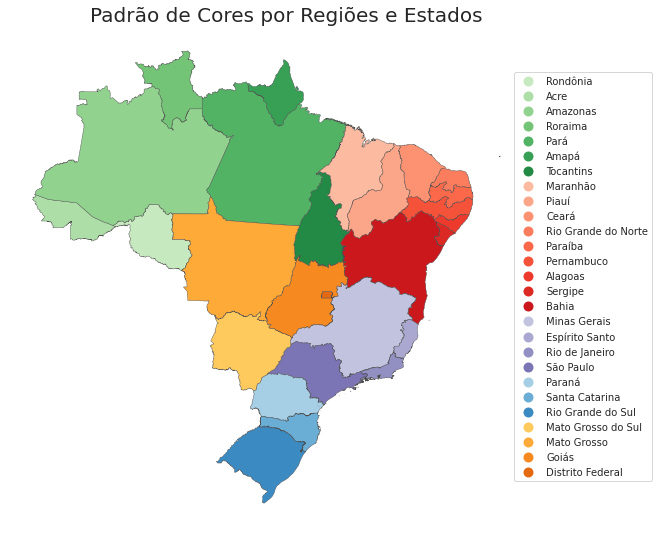

In [11]:
geo_colors_plot()

## Taxa de Mortalidade

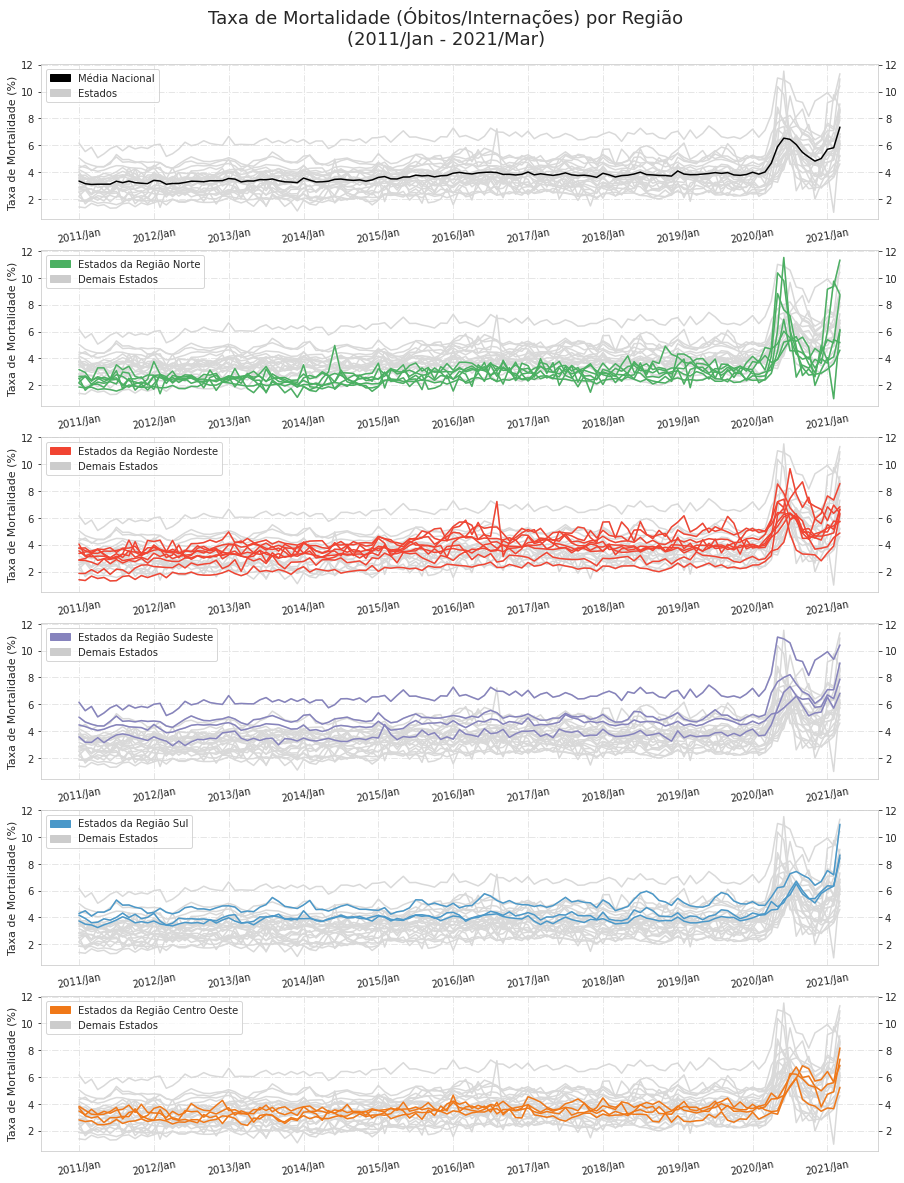

In [27]:
fig, axs = plt.subplots(6,1,figsize=(15,20), sharey=True)
plot_lines(df=taxa_mortalidade, 
           suptitle='Taxa de Mortalidade (Óbitos/Internações) por Região\n(2011/Jan - 2021/Mar)',
          add_national_mean=True)

Num primeiro contato com estes gráficos, os olhos tendem a se direcionar imediatamente ao aumento repentino da taxa de mortalidade em 2020. Após anos de taxas de mortalidade relativamente bem contidas no intervalo entre 2% e 5%, a pandemia iniciada em 2020 alavancou estes valores para até mais de 10%, no caso de estados como Roraima, Amazonas, Rio de Janeiro e Rio Grande do Sul, visíveis na tabela abaixo de *Máxima Taxa de Mortalidade por Estado*. Esta mesma tabela também mostra que para todos os estados as máximas ocorreram nos meses mais frios e secos de 2020 (maio a setembro) ou em março de 2021.

Além disto, no gráfico acima, o Rio de Janeiro também chama a atenção por sua posição claramente distanciada dos demais, com uma taxa que já ultrapassa os 6% há anos.

Outro fator relevante é a grande variação da taxa de mortalidade na região Norte, que até 2020 possuia as menores taxas, mas durante a pandemia sofreu com as maiores crescentes em estados como Roraima e Amazonas.

In [16]:
valores_maximos_por_estado = (pd.concat([taxa_mortalidade.T.max()/100, taxa_mortalidade.T.idxmax()], 
                                        axis=1, keys=['Máxima Taxa de Mortalidade por Estado','Mês de Ocorrência']))

## em caso de erro na formatação de datas, descomentar as duas linhas abaixo
# import locale
# locale.setlocale(locale.LC_ALL , 'pt_BR.UTF-8')

meses_ocorrencia = (pd.to_datetime(valores_maximos_por_estado['Mês de Ocorrência'].unique(), format='%Y/%b')).sort_values().strftime('%B de %Y')
meses_ocorrencia = [item.capitalize() for item in meses_ocorrencia]
print('Meses de ocorrência das máximas taxas de mortalidade por estado: \n\n- {}'.format('\n- '.join(meses_ocorrencia)))

# valores_maximos_por_estado.sort_values(by='Máxima Taxa de Mortalidade por Estado',ascending=False)
subset=['Máxima Taxa de Mortalidade por Estado']
display(valores_maximos_por_estado.sort_values(by='Máxima Taxa de Mortalidade por Estado',ascending=False)
                .style.bar(subset, width=60, color='darkgrey')
                .format('{:.2%}',subset)
                )

Meses de ocorrência das máximas taxas de mortalidade por estado: 

- Maio de 2020
- Junho de 2020
- Julho de 2020
- Agosto de 2020
- Setembro de 2020
- Março de 2021


,Máxima Taxa de Mortalidade por Estado,Mês de Ocorrência
Roraima,11.52%,2020/Jun
Amazonas,11.33%,2021/Mar
Rio de Janeiro,11.01%,2020/Mai
Rio Grande do Sul,10.95%,2021/Mar
Paraíba,9.67%,2020/Jul
São Paulo,9.08%,2021/Mar
Amapá,8.83%,2020/Mai
Sergipe,8.69%,2020/Set
Rondônia,8.69%,2021/Mar
Santa Catarina,8.66%,2021/Mar


## Óbitos e Internações per Capita nas Regiões

Como já destacado na parte I, a taxa de mortalidade aqui referenciada é a razão entre óbitos e internações. Portanto, agora analisaremos melhor a distribuição destas duas variáveis nas regiões do Brasil durante o período entre os anos 2011 e 2021, corrigindo os valores pela população da respectiva região.

In [16]:
# criando dataframes que corrigem obitos e internacoes regionais pelas populações das respectivas regioes
obitos_per_capita = divide_by_population(obitos, return_regions=True)
internacoes_per_capita = divide_by_population(internacoes, return_regions=True)

<ipython-input-15-390d4020d966>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


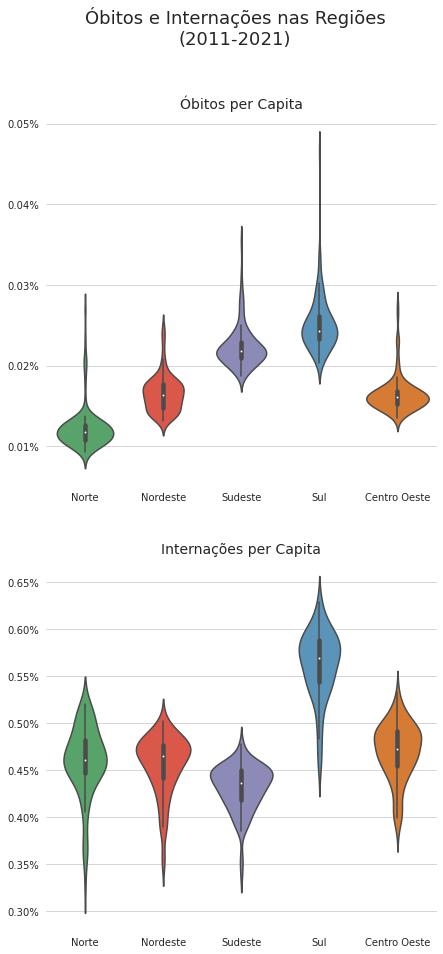

In [17]:
fig, axs = plt.subplots(2,1,figsize=(7,15), constrained_layout=False)

dfs=[obitos_per_capita, internacoes_per_capita]
titles=['Óbitos per Capita', 'Internações per Capita']

violinplots(dfs, titles, orient='v', suptitle='Óbitos e Internações nas Regiões\n(2011-2021)\n')

As caudas alongadas nos valores de cada região indicam a ocorrência de um pequeno conjunto de valores que é muito diferente da maioria, também conhecidos como *outliers* em estatística.

Nos gráficos acima, observamos *outliers* acima do padrão de óbitos per capita, e abaixo do padrão de internações per capita. 

Uma suposição possível é que estes *outliers* podem dizer respeito ao período entre 2020 e 2021, devido à pandemia da COVID-19. Para investigar melhor, repetiremos estes gráficos separando os dados em duas séries: uma até dezembro de 2019, e outra a partir de janeiro de 2020. A representação gráfica desta segmentação temporal será num gráfico semelhante, mas com duas colunas, uma para cada novo período.

<ipython-input-25-6fe80bbca2a8>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


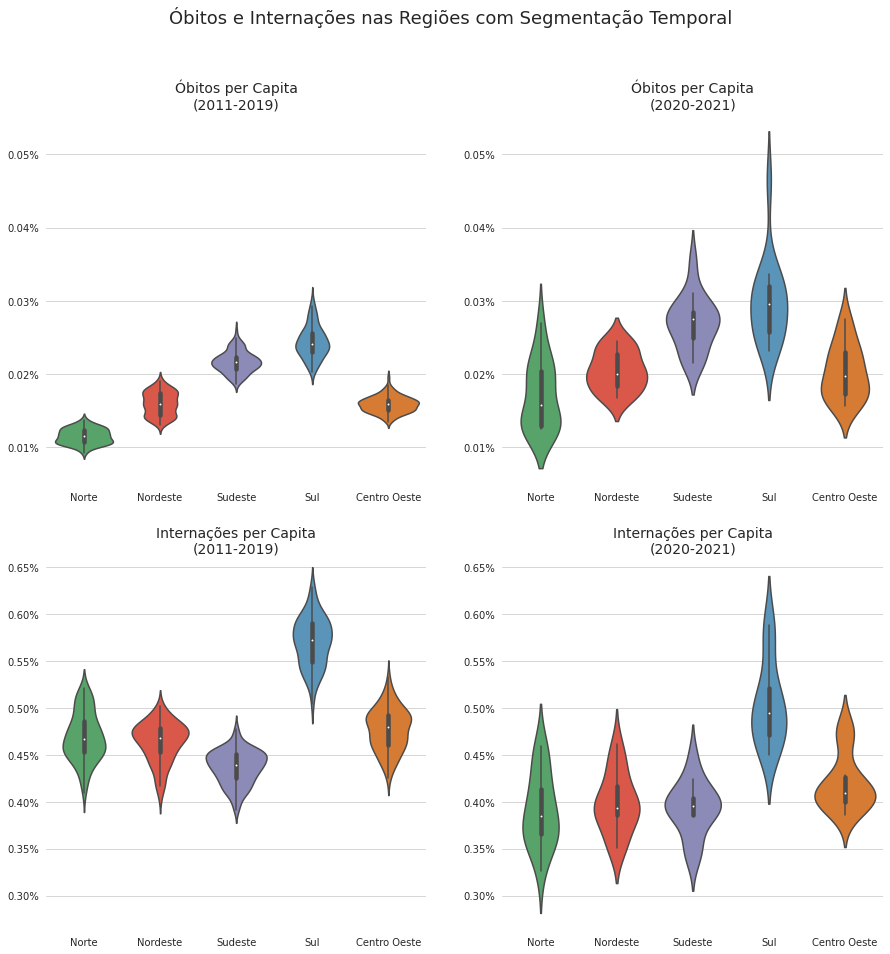

In [32]:
## Separando gráficos anteriores por período: até 2019 e pós-2020.

fig, axs = plt.subplots(2,2,figsize=(15,15), constrained_layout=False)

dfs=[obitos_per_capita.loc[:,:'2019/Dez'],
    obitos_per_capita.loc[:,'2020/Jan':],
    internacoes_per_capita.loc[:,:'2019/Dez'],
    internacoes_per_capita.loc[:,'2020/Jan':]]

titles=['Óbitos per Capita\n(2011-2019)',
       'Óbitos per Capita\n(2020-2021)',
       'Internações per Capita\n(2011-2019)',
       'Internações per Capita\n(2020-2021)']

violinplots(dfs, titles,  orient='v', 
            suptitle='Óbitos e Internações nas Regiões com Segmentação Temporal\n')

axs.flat[0].sharey(axs.flat[1])
axs.flat[2].sharey(axs.flat[3])

Como suspeito, a separação deixou os gráficos menos dispersos. 

Na série 2011-2019, tantos óbitos como internações apresentam distribuições menos alongadas. 

Já a partir de 2020, o aumento da taxa de mortalidade observado no primeiro gráfico deste estudo é aqui explicitada por um movimento duplo: aumento de óbitos per capita e redução de internações per capita.

É importante destacar que os valores de 2021 ainda estão muito recentes e podem ser alterados retroativamente, devido à forma como o processamento das internações é realizado no SUS.

## Estados

Direcionando a análise para o nível estadual, esta seção replica para as 27 Unidades da Federação a exploração feita a nível regional.

Primeiro, corrigimos os óbitos e internações mensais pela população mensal projetada pelo IBGE. Então, inserimos estes dados no gráfico abaixo, ordenando de forma descrescente pela média das taxas de mortalidade de cada estado. Esta média é representada pelo ponto branco central de cada violino da terceira coluna.

As cores utilizadas fazem referência a região à qual cada um pertence. Isso torna visível a concentração de estados do Sul e Sudeste com as maiores médias. Os representantes do Centro Oeste aparecem centralizados, os do Norte com as menores taxas, e o Nordeste bem distribuído. 

In [19]:
obitos_per_capita_states = divide_by_population(obitos, return_regions=False)
internacoes_per_capita_states = divide_by_population(internacoes, return_regions=False)

<ipython-input-15-390d4020d966>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.2%}'.format(x) for x in ax.get_xticks()])


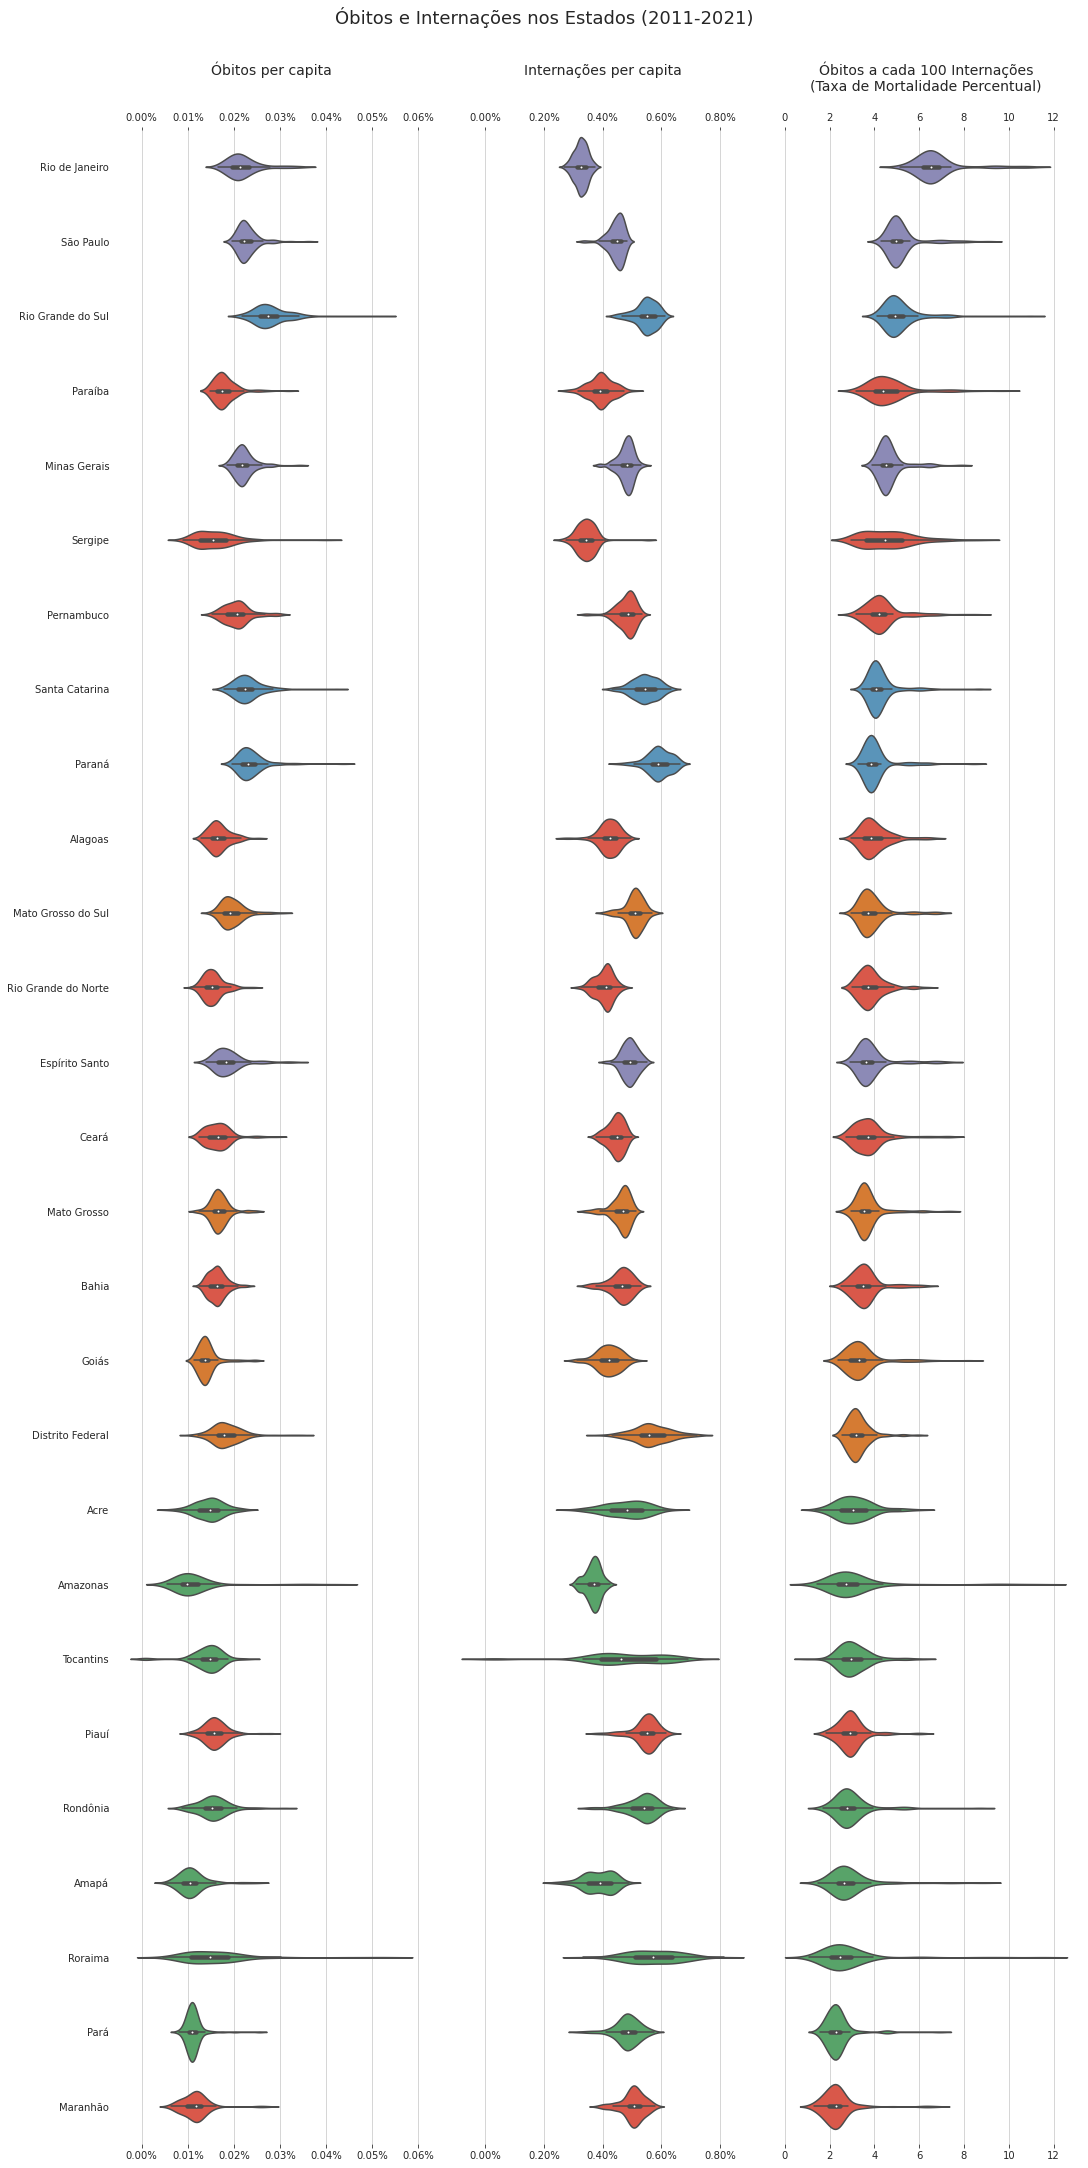

In [20]:
#### Gráfico de óbitos, internações e taxa de mortalidade nas unidades da federação

fig, axs = plt.subplots(1, 3, figsize=(15,30), sharey=True, sharex=False, constrained_layout=True)

violinplots(dfs=[obitos_per_capita_states, internacoes_per_capita_states, taxa_mortalidade],
            titles=['Óbitos per capita\n\n', 
                    'Internações per capita\n\n',
                    'Óbitos a cada 100 Internações\n(Taxa de Mortalidade Percentual)\n'],
            orient='h',
            suptitle='Óbitos e Internações nos Estados (2011-2021)\n')
# plt.tight_layout()

A grande vantagem dos gráficos de violino é também sua fraqueza: a quantidade de informação presente em cada "violino".

Pode-se observar a distribuição dos dados ao comparar, por exemplo, Roraima e Pará. Nas três variáveis (óbitos per capita, internações per capita e taxa de mortalidade) Roraima tem uma variabilidade de dados muito maior que o Pará, que possui curvas mais "densas" e concentradas em torno da média.

Além disso, observamos aqui o mesmo comportamento de *outliers* visto no nível regional. A grande maioria dos estados apresenta *outliers* muito acima da média para óbitos e muito abaixo da média para internações, refletindo taxas de mortalidade acima da maioria dos valores da série.

Para analisar a evolução temporal recente destas taxas de mortalidade, voltemos ao gráfico de linhas inicial deste estudo, selecionando apenas valores a partir de 2020.

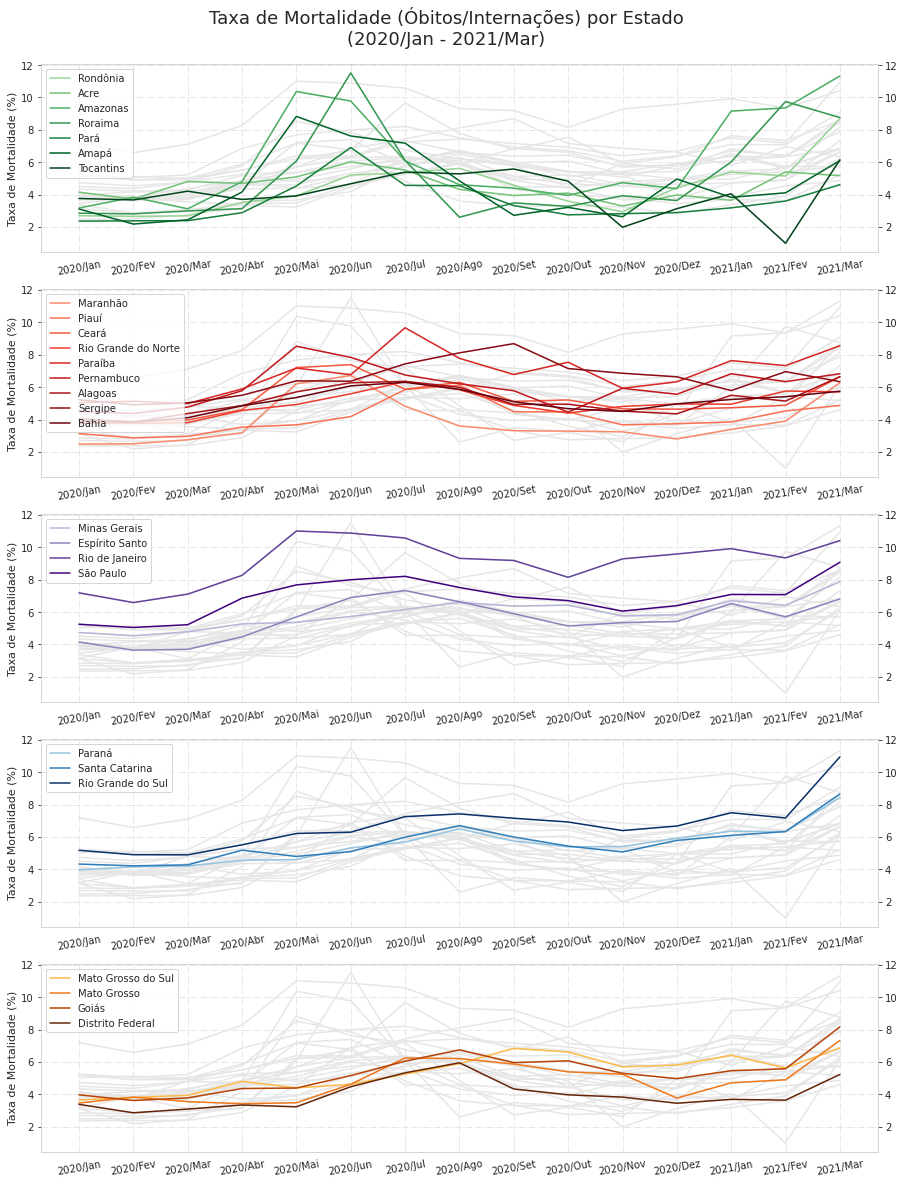

In [14]:
fig, axs = plt.subplots(5,1,figsize=(15,20), sharey=True)
plot_lines(taxa_mortalidade.loc[:,'2020/Jan':],
                       state_level=True,
                       colormap=stronger_colormaps,
                       suptitle='Taxa de Mortalidade (Óbitos/Internações) por Estado\n(2020/Jan - 2021/Mar)')

O movimento da taxa de mortalidade parece acompanhar o avanço da pandemia e os consequentes colapsos de sistema de saúde nas várias unidades da federação. A taxa de mortalidade aumenta conforme acontece o movimento conjunto de mais óbitos e menos internações.

Diferentemente do aumento de óbitos de per capita, causada direta e indiretamente pela pandemia, a redução das internações per capita não é tão diretamente expicável. 
Uma hipótese a ser investigada é que as internações tenham sido reduzidas a casos muito necessários, a fim de evitar a circulação em ambientes hospitalares. Se for este o caso, isto pode acabar tendo um efeito impulsionador dos óbitos, já que internações mais urgentes tendem a representar casos mais graves, com consequentes maiores probabilidades de óbito.

De qualquer forma, os valores mais recentes de 2021 apresentam uma clara tendência de crescimento da taxa de mortalidade, com prováveis novos recordes nos próximos meses. Retomando (tabela abaixo) a mesma tabela apresentada na seção 3.1, podemos afirmar que 12 dos 27 estados brasileiros (44,45%) atingiram, em março de 2021, suas taxas máximas de mortalidade desde 2011.

In [17]:
pd.concat([valores_maximos_por_estado['Mês de Ocorrência'].value_counts(),
           valores_maximos_por_estado['Mês de Ocorrência'].value_counts(normalize=True)],
           axis=1, 
           keys=['Frequência', 'Frequência Normalizada'])

,Frequência,Frequência Normalizada
2021/Mar,12,0.444444
2020/Jun,5,0.185185
2020/Jul,4,0.148148
2020/Mai,3,0.111111
2020/Ago,2,0.074074
2020/Set,1,0.037037


# Próximos Passos

O projeto foi elaborado com uma visão de longo prazo que envolve sua atualização conforme novos dados estejam disponíveis e também sua incrementação com mais análises. Buscarei manter o código bem explicado, para incentivar contribuições de outras pessoas.

Nesta **versão preliminar** as prioridades foram: estruturar o *notebook*, organizar os dados e padronizar as visualizações para explorações futuras.

Portanto, alguns incrementos futuros necessários e/ou desejáveis são:

- Desenvolver melhor a análise textual
- Aproveitar a riqueza dos dados para desenvolver e testar hipóteses
- Incluir dados sobre capacidade de internações/número de leitos de cada estado ou região
- Incluir na parte I uma curta seção sobre “como ler gráficos de violino (*violinplots*)”
- Organizar melhor o código transformando as variáveis e funções em atributos e métodos de classes
- Explorar a visualização com dados geoespaciais, utilizada até agora apenas de forma indireta para mostrar o padrão de cores por regiões e unidades da federação

Qualquer ajuda é bem vinda. Se você tem interesse em contribuir com o projeto, sinta-se à vontade para enviar sugestões, correções e críticas.

# Fontes dos Dados

Aqui encontram-se as referências para se acessar as bases de dados utilizadas.

**DataSUS**: Internações, Óbitos e Taxa de Mortalidade

Entre em: https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/ 

Siga:

\> Produção Hospitalar (SIH/SUS)

\> Dados Consolidados AIH (RD), por local de internação, a partir de 2008 

\> Abrangência geográfica: Brasil por Região e Unidade da Federação

Faça o download dos seguintes dados:

(Linha, Coluna, Conteúdo, Períodos)

1: Unidade da Federação, Ano/mês processamento, Internações, Jan/2008 ~ Mar/2021

2: Unidade da Federação, Ano/mês processamento, Óbitos, Jan/2008 ~ Mar/2021

3: Unidade da Federação, Ano/mês processamento, Taxa mortalidade, Jan/2008 ~ Mar/2021

---

**IBGE**: Dados Demográficos

- Anuais:

População Residente Estimada: https://sidra.ibge.gov.br/tabela/6579

- Mensais:

Projeção da População por Sexo e Idade para o Período 2000 - 2030 (Revisão 2018): https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?=&t=downloads

---

**Dados Geoespaciais**

Biblioteca [geobr](https://ipeagit.github.io/geobr/index.html)

# Contato

Nome: Murilo Amaral

GitHub: https://github.com/mumaral/

Email: [mumaral@protonmail.com](mailto:mumaral@protonmail.com)

LinkedIn: https://www.linkedin.com/in/mumaral/